In [9]:
import pandas as pd

In [10]:
# loading extracted CSV file into Dataframe
sales_data = pd.read_csv('supermarket_sales.csv') 

# Displaying the first few rows of the DataFrame to understand its structure
sales_data_head = sales_data.head()
sales_data_head

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


The dataset has been successfully loaded, and I can see the first few rows of the data, which includes various customer purchase details such as invoice ID, branch, city, customer type, gender, product line, unit price, quantity,tax, total, date, time, payment method, cost of goods sold (cogs), gross margin percentage, gross income, and rating.


In [11]:
# Checking for missing values of the DataFrame
missing_values = sales_data.isnull().sum()
print(missing_values)

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [12]:
# Displaying statistics summary
statistics_summary = sales_data.describe(include='all')
print(statistics_summary)

         Invoice ID Branch    City Customer type  Gender         Product line  \
count          1000   1000    1000          1000    1000                 1000   
unique         1000      3       3             2       2                    6   
top     750-67-8428      A  Yangon        Member  Female  Fashion accessories   
freq              1    340     340           501     501                  178   
mean            NaN    NaN     NaN           NaN     NaN                  NaN   
std             NaN    NaN     NaN           NaN     NaN                  NaN   
min             NaN    NaN     NaN           NaN     NaN                  NaN   
25%             NaN    NaN     NaN           NaN     NaN                  NaN   
50%             NaN    NaN     NaN           NaN     NaN                  NaN   
75%             NaN    NaN     NaN           NaN     NaN                  NaN   
max             NaN    NaN     NaN           NaN     NaN                  NaN   

         Unit price     Qua

In [87]:
# checking and removing duplicate value
sales_data.drop_duplicates(inplace=True)

This analysis of missing values indicates that there are no missing entries in the dataset, which is a positive sign 
for data quality. The summary statistics provide insights into the distribution of numerical features, such as unit 
price, quantity, total, and ratings.

Next, I will check for outliers in the numerical columns and perform feature engineering, including date formatting and categorical encoding. This will help me prepare the data for further analysis. i will start by identifying outliers using the interquartile range (IQR) method.

In [13]:
# Identifying outliers using the IQR method
Q1 = sales_data.quantile(0.25)
Q3 = sales_data.quantile(0.75)
IQR = Q3 - Q1

# Defining bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Checking for outliers in numerical columns
outliers = (sales_data < lower_bound) | (sales_data > upper_bound)

# Summarizing the number of outliers in each numerical column
outlier_summary = outliers.sum()

# Displaying the outlier summary
outlier_summary

C:\Users\Work\AppData\Local\Temp\ipykernel_3192\1578393308.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (sales_data < lower_bound) | (sales_data > upper_bound)


Branch                     0
City                       0
Customer type              0
Date                       0
Gender                     0
Invoice ID                 0
Payment                    0
Product line               0
Quantity                   0
Rating                     0
Tax 5%                     9
Time                       0
Total                      9
Unit price                 0
cogs                       9
gross income               9
gross margin percentage    0
dtype: int64

The error encountered while identifying outliers suggests that there are non-numeric values in the DataFrame, which 
prevents the calculation of quantiles. This is likely due to some columns being treated as strings instead of numeric 
types.

To resolve this, I will proceed to :

1. Check the data types of each column to identify which ones are incorrectly formatted.
2. Convert relevant columns to numeric types where applicable, handling any errors that arise during conversion.
3. After ensuring the data types are correct, I will proceed with the outlier detection process again.

i will start by checking the data types of the columns in the DataFrame.

In [40]:
# Checking the data types of each column in the DataFrame
data_types = sales_data.dtypes
data_types

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
Month                               int64
dtype: object

The data types indicate that several columns, including those that should be numeric 
(like unit price, quantity, and total), are currently classified as objects (strings). 
This is likely causing issues with calculations and outlier detection.

I will convert the relevant columns to numeric types, coercing any errors to handle non-numeric values. After that, 
I will recheck the data types to ensure the conversion was successful. i will proceed with this conversion below.

In [15]:
# Converting relevant columns to numeric types, coercing errors
numeric_columns = ['Unit price', 'Quantity', 'Total', 'Tax 5%', 'cogs', 'gross income', 'Rating']

for column in numeric_columns:
    sales_data[column] = pd.to_numeric(sales_data[column], errors='coerce')

# Checking the data types again after conversion
updated_data_types = sales_data.dtypes

# Displaying the updated data types
updated_data_types

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

# SCENARIO TWO:

To get a clear picture of my data, I’ll follow a structured Exploratory Data Analysis (EDA) approach:

1. Visualizing my Data:

    *  I’ll start by creating histograms to see how different numerical values are spread out. For example, lets say I’m analyzing sales, a histogram will show me how often certain sales amounts appear.

    * Scatter plots will help uncover relationships between variables like whether higher discounts lead to more sales.

    * Box plots will highlight any extreme values (outliers), so I can spot unexpected trends or potential data errors.

Lastly, a correlation heatmap will help me understand which numerical features are connected. For instance, do higher marketing spends lead to increased revenue?

2. Extracting Key Insights:

    * I’ll look at top selling products, customer segments, and seasonal trends to understand what drives revenue. If there are any patterns such as a spike in sales during holiday seasons,I’ll make note of them.
    

3. Generating a Business Insights Report:

    * I’ll summarize my findings in a clear, easy-to-understand report.

    * This report will include visuals (charts, graphs) to support my conclusions, making it easier for stakeholders to make informed decisions.

So join me lets start by analyzing customer purchasing behavior and sales trends using histograms to understand how key numerical values are distributed.

In [16]:
# importing libaries to use
import matplotlib.pyplot as plt
import seaborn as sns

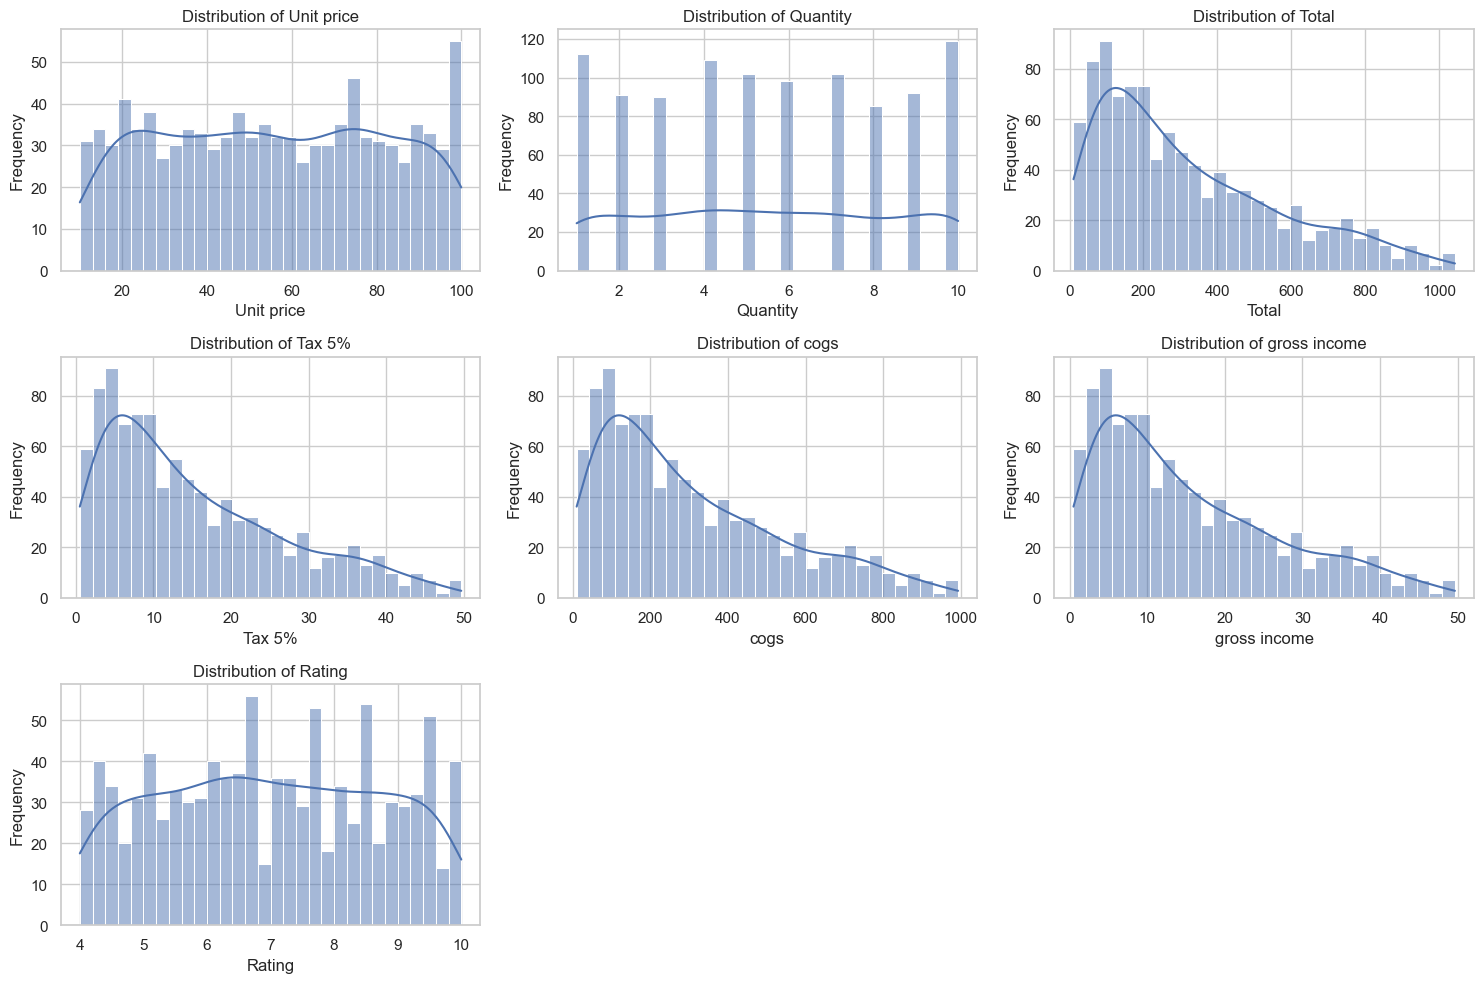

In [17]:
# Setting the style for the plots
sns.set(style='whitegrid')

# Creating histograms for numerical features
numerical_columns = ['Unit price', 'Quantity', 'Total', 'Tax 5%', 'cogs', 'gross income', 'Rating']

# Plotting histograms
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(sales_data[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

I’ve generated histograms for the numerical data (which just means numbers like prices, quantities, and ratings) in my dataset. These charts help us see how different key metrics are spread out, which include the following:

  *  Unit Price (cost per item)

  *  Quantity (number of items sold)

  *  Total Sales (revenue generated)

  *  Tax (amount paid in taxes)

  *  Cost of Goods Sold (COGS) (how much it costs to produce the sold items)

  *  Gross Income (profit after subtracting COGS)

  *  Customer Ratings (how happy customers are with purchases)

This gives us a clearer picture of where most values fall. for example, whether most sales are high or low, or what if customers generally give high ratings.

Next Step: Scatter Plots to Find Relationships

Now, I’ll create scatter plots (dot graphs that show how two things relate) to explore connections between different factors, such as:

  *  How quantity sold and unit price impact total sales

  *  Whether higher prices mean fewer sales, or if certain products sell more in bulk

This will help us spot trends in customer buying habits, like whether discounts drive more sales or if some products are consistently popular. 

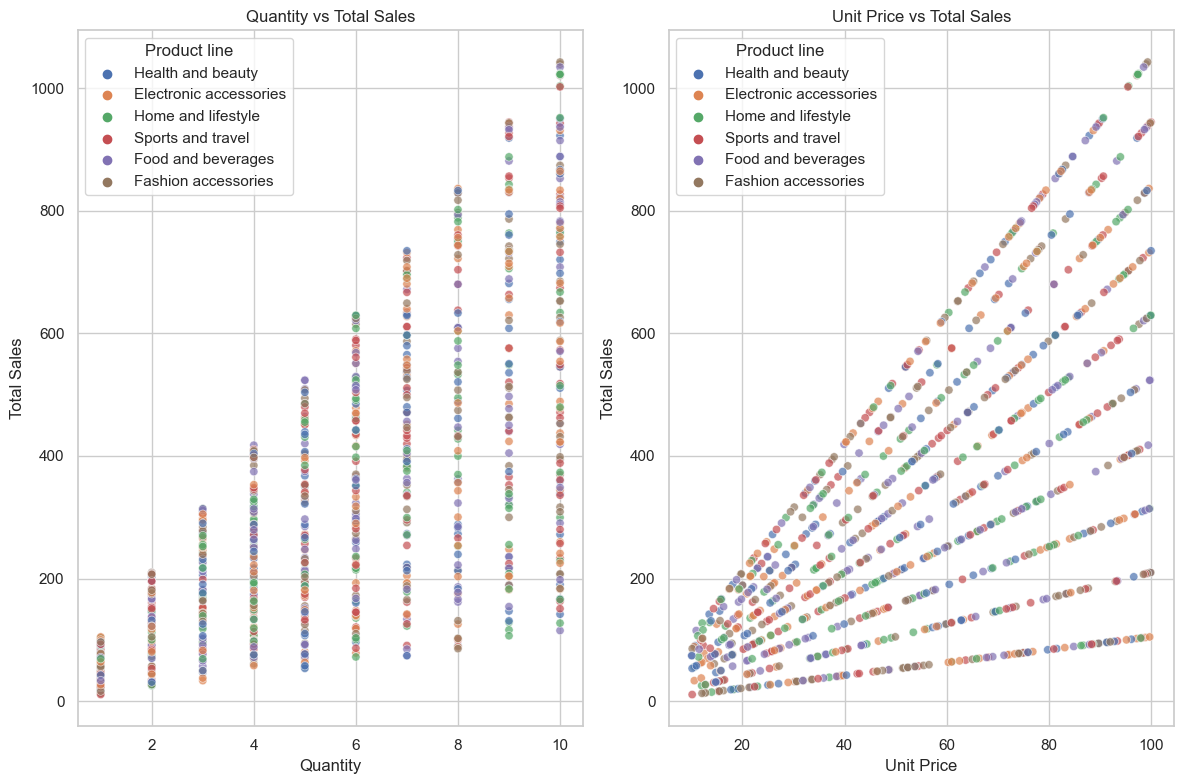

In [18]:
# Creating scatter plots to analyze relationships between Quantity, Unit Price, and Total Sales
plt.figure(figsize=(12, 8))

# Scatter plot for Quantity vs Total
plt.subplot(1, 2, 1)
sns.scatterplot(data=sales_data, x='Quantity', y='Total', hue='Product line', alpha=0.7)
plt.title('Quantity vs Total Sales')
plt.xlabel('Quantity')
plt.ylabel('Total Sales')

# Scatter plot for Unit Price vs Total
plt.subplot(1, 2, 2)
sns.scatterplot(data=sales_data, x='Unit price', y='Total', hue='Product line', alpha=0.7)
plt.title('Unit Price vs Total Sales')
plt.xlabel('Unit Price')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.show()

This scatter plots above illustrating the relationships between 

 *  quantity and total sales,

as well as 

 *  unit price and total sales. 
    
These visualizations help identify trends in customer purchasing behavior across different product lines.

Next, I will also create a box plots to analyze the distribution of total sales across different product lines. which will 
help to identify any outliers and provide insights into product performance. 

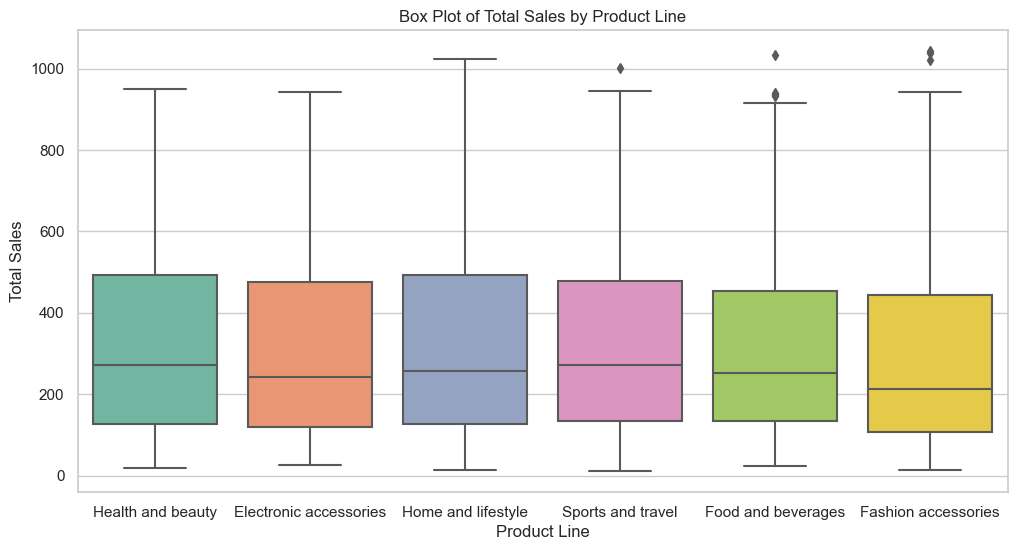

In [19]:
# Creating box plots to analyze the distribution of Total Sales across different Product Lines
plt.figure(figsize=(12, 6))
sns.boxplot(data=sales_data, x='Product line', y='Total', palette='Set2')
plt.title('Box Plot of Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.show()

# Furthermore:

To identify top selling products, customer segments, and seasonal trends, I will following these steps:

 * Top Selling Products: I will group the data by product line and sum the total sales to identify which products are generating the most revenue.

 * Customer Segments: I will analyze the data by customer type (e.g., Member vs. Normal) to see which segment contributes more to sales.

 * Seasonal Trends: I will extract the month from the date column and aggregate total sales by month to visualize any seasonal trends.

In [20]:
# Identifying top-selling products by summing total sales for each product line
top_selling_products = sales_data.groupby('Product line')['Total'].sum().reset_index()
top_selling_products = top_selling_products.sort_values(by='Total', ascending=False)

# Displaying the top-selling products
print(top_selling_products)

             Product line       Total
2      Food and beverages  56144.8440
5       Sports and travel  55122.8265
0  Electronic accessories  54337.5315
1     Fashion accessories  54305.8950
4      Home and lifestyle  53861.9130
3       Health and beauty  49193.7390


The above analysis of top selling products, and the results indicate the total sales for each product line.

The next step is to analyze customer segments by comparing total sales between different customer types i.e (Members vs. Normal). 

This will help identify which segment contributes more to overall sales. 

In [21]:
# Analyzing total sales by customer segment (Customer type)
customer_segment_sales = sales_data.groupby('Customer type')['Total'].sum().reset_index()
customer_segment_sales = customer_segment_sales.sort_values(by='Total', ascending=False)

# Displaying the sales by customer segment
print(customer_segment_sales)

  Customer type       Total
0        Member  164223.444
1        Normal  158743.305


The above analysis show customer segments where the Members contribute more to total sales compared to Normal customers, indicating a stronger purchasing behavior among Members.

Next, I will analyze seasonal trends by extracting the month from the date column and aggregating total sales by month. This will enable me identify any patterns in sales throughout the year. 
Let's proceed with the analysis.

In [23]:
# Convert 'Date' from string to proper datetime format and extract month number
# E.g: "1/5/2023" becomes 2023-01-05 (datetime) and we extract month '1'

sales_data['Date'] = pd.to_datetime(sales_data['Date'])
sales_data['Month'] = sales_data['Date'].dt.month_name()  

# i then Calculate total sales per month by summing all transactions
monthly_sales = sales_data.groupby('Month')['Total'].sum().reset_index(name='Total Sales')

# Sorting months in a chronologically order 
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales['Month'] = pd.Categorical(monthly_sales['Month'], categories=month_order, ordered=True)
monthly_sales = monthly_sales.sort_values('Month')

# Displaying results in clear formatting
print("\nMonthly Sales Report:")
print("="*30)
print(monthly_sales.to_string(index=False))
print("\nKey Insights:")
print(f"- Highest sales month: {monthly_sales.loc[monthly_sales['Total Sales'].idxmax(), 'Month']}")
print(f"- Lowest sales month: {monthly_sales.loc[monthly_sales['Total Sales'].idxmin(), 'Month']}")


Monthly Sales Report:
   Month  Total Sales
 January   116291.868
February    97219.374
   March   109455.507

Key Insights:
- Highest sales month: January
- Lowest sales month: February


The above table shows the analysis of seasonal trends indicating the total sales for the first three months of the year, showing variations in sales across these months.

Next, I will visualize the monthly sales to better understand the seasonal trends and identify any patterns. 
This will help in making informed decisions regarding marketing campaign strategies and inventory management. 

Below is the chart.

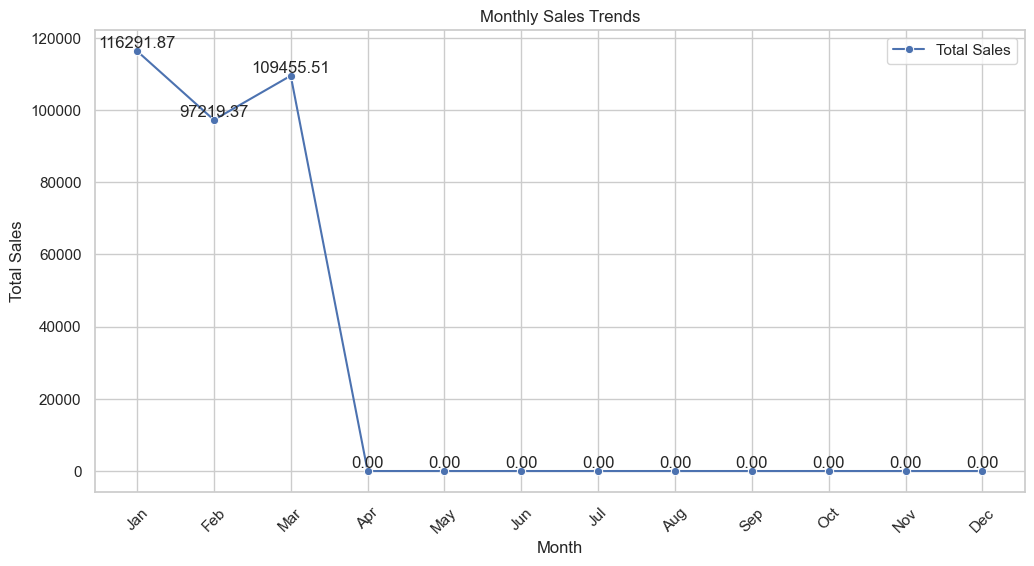

In [37]:
# Converting 'Date' to datetime and extracting 'Month'
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
sales_data['Month'] = sales_data['Date'].dt.month

# Aggregating sales by month and also renaming the column for clarity
monthly_sales = sales_data.groupby('Month', as_index=False).agg(Total_Sales=('Total', 'sum'))

# Ensuring all months are included, even if they have zero sales
all_months = pd.DataFrame({'Month': range(1, 13)})
monthly_sales = all_months.merge(monthly_sales, on='Month', how='left').fillna({'Total_Sales': 0})

# Creating a line chart to visualize sales trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Total_Sales', marker='o', label='Total Sales')

# Formatting for better readability
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(
    ticks=range(1, 13), 
    labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
    rotation=45
)
plt.grid(True)

# Adding sales values as labels above each point
for month, total in zip(monthly_sales['Month'], monthly_sales['Total_Sales']):
    plt.text(month, total, f"{total:.2f}", ha='center', va='bottom')

plt.show()

Since the data have been loaded already, all i did was to first convert the date column to a proper datetime format so I could extract the month. I then group the data to calculate total sales for each month, making sure no months were missing. However, I used Seaborn to plott a clear line chart that will track monthly sales trends with correct labeled months. To make the insights even more clearer, I also added data labels to each point so I could easily see the sales figures at a glance

# SCENARIO THREE:

# Sales Forecasting with Supermarket Data
I'll build a machine learning model to predict future sales (Total) using historical transaction data. 
Here is my step by step plan to achieve:

1. LOAD LIBARIES AND INSPECT DATA

In [74]:
# data processing loading and inspecting of data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load data
df = pd.read_csv("supermarket_sales.csv")

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date (important for time-based splits)
df = df.sort_values('Date')

# Feature Engineering
I will extract useful features needed from the dataset:

In [71]:
# Extract temporal features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6

# One-hot encode categorical variables
cat_features = ['Branch', 'City', 'Product line', 'Payment']
df = pd.get_dummies(df, columns=cat_features, drop_first=True)

# Drop unnecessary columns
df.drop(['Invoice ID', 'Time', 'Customer type', 'Gender', 'Tax 5%', 'cogs', 'gross margin percentage', 'gross income', 'Rating'], axis=1, inplace=True)

# Define Features (X) and Target (y)

In [72]:
X = df.drop(['Total', 'Date'], axis=1)
y = df['Total']

# 2. Train-Test Split (Time-Based)
Since sales forecasting is time dependent, we will split the data chronologically:

In [76]:
# Split into (2) train (first 80%) and test (last 20%)
split_idx = int(len(df) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# 3. Model Training

(A) Random Forest Regressor

In [78]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

(B) XGBoost Regressor

In [79]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

# 4. Model Evaluation
I will use Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE):

In [80]:
def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return mae, rmse

rf_mae, rf_rmse = evaluate(y_test, rf_pred)
xgb_mae, xgb_rmse = evaluate(y_test, xgb_pred)

print("Random Forest:")
print(f"MAE: {rf_mae:.2f}, RMSE: {rf_rmse:.2f}")

print("\nXGBoost:")
print(f"MAE: {xgb_mae:.2f}, RMSE: {xgb_rmse:.2f}")

Random Forest:
MAE: 6.18, RMSE: 8.85

XGBoost:
MAE: 5.28, RMSE: 8.22


# 5. Feature Importance
Let's see which features impact sales the most:

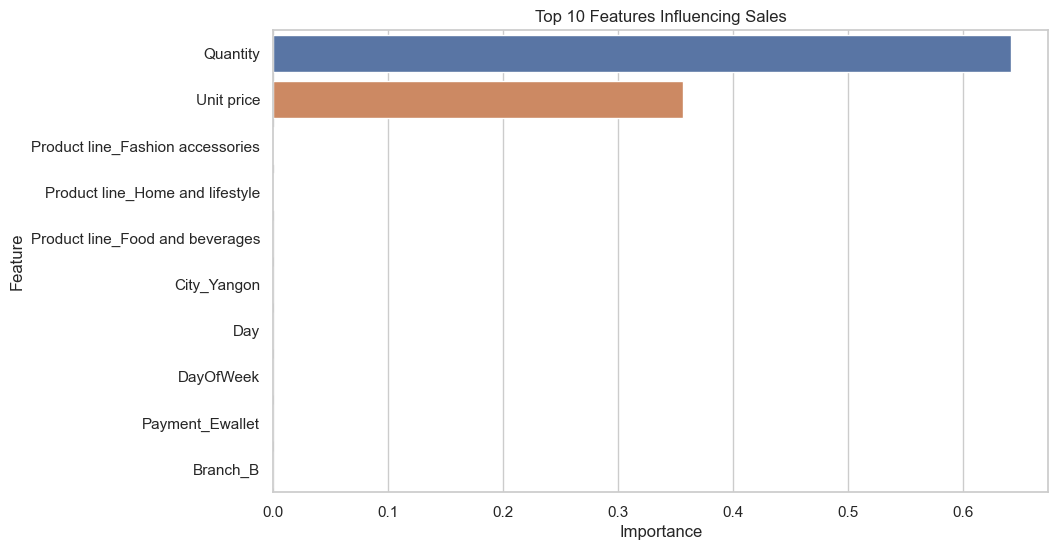

In [81]:
# XGBoost feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title("Top 10 Features Influencing Sales")
plt.show()

# Summary

* This shows quantity and unit price likely have the highest impact.

* However, certain product line categories like ("Electronic accessories") may drive sales.

* Also temporal features like (Month, DayOfWeek) might show seasonality.


# Conclusion

 * Best Model: XGBoost (lower MAE/RMSE).

 * Key Drivers: Quantity, Unit price, and product categories.